   Home   Price  SqFt  Bedrooms  Bathrooms  Offers  Brick_Yes  \
0     1  114300  1790         2          2       2      False   
1     2  114200  2030         4          2       3      False   
2     3  114800  1740         3          2       1      False   
3     4   94700  1980         3          2       3      False   
4     5  119800  2130         3          3       3      False   

   Neighborhood_North  Neighborhood_West  
0               False              False  
1               False              False  
2               False              False  
3               False              False  
4               False              False  
Home                  0
Price                 0
SqFt                  0
Bedrooms              0
Bathrooms             0
Offers                0
Brick_Yes             0
Neighborhood_North    0
Neighborhood_West     0
dtype: int64
Mean Squared Error (MSE): 320149938.23026806
Mean Squared Error (MSE) with Decision Tree: 551073461.5384616
Accuracy: 0.45

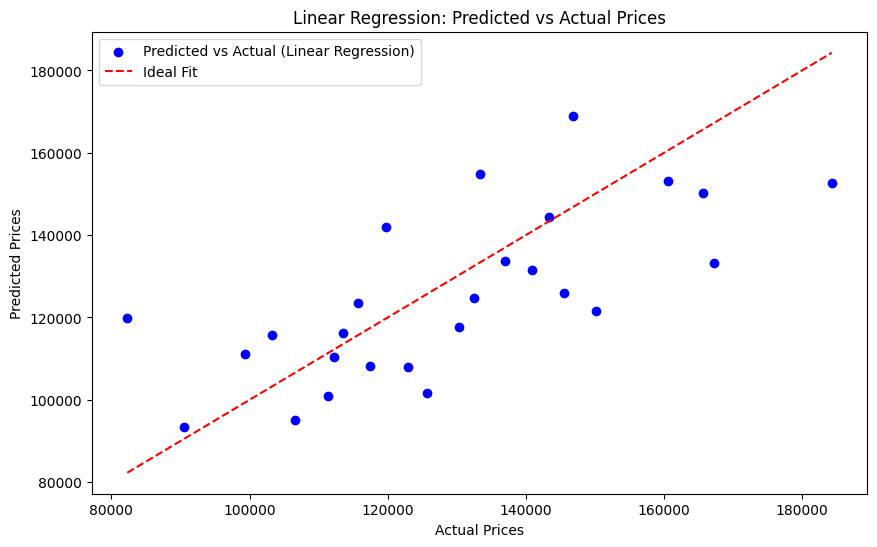

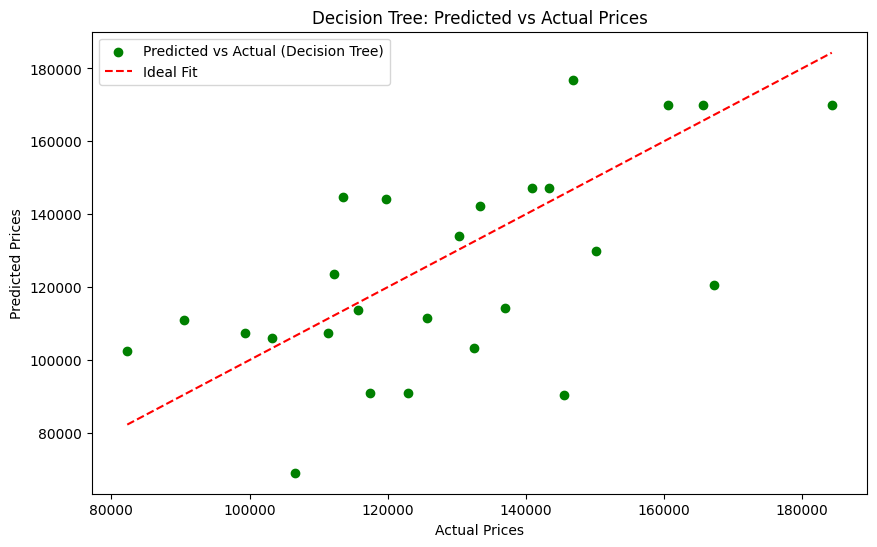

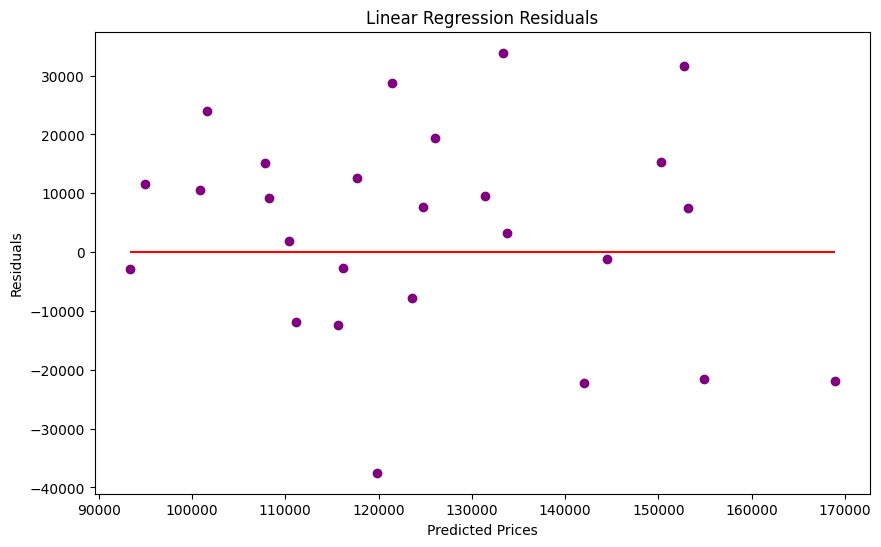

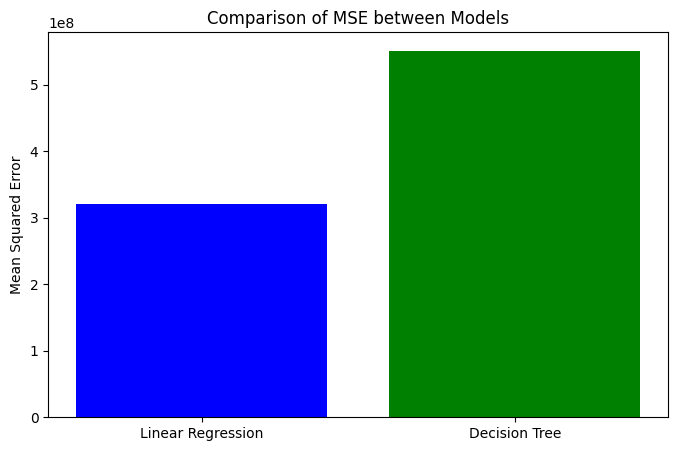

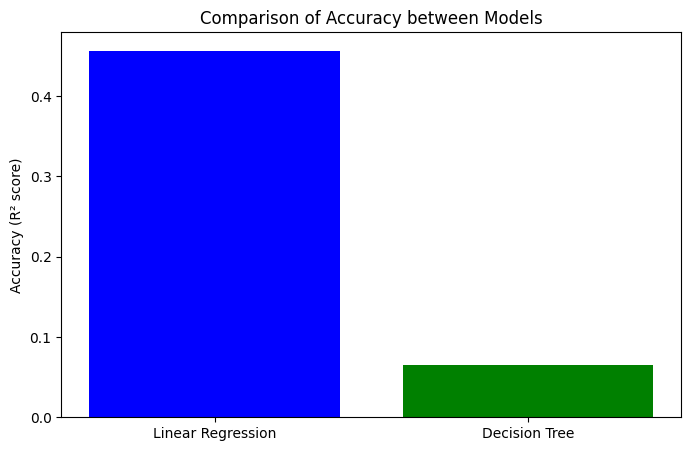

In [ ]:
# تحميل المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix



# تحميل البيانات
data = pd.read_csv("house-prices.csv")

data = pd.get_dummies(data, columns=['Brick', 'Neighborhood'], drop_first=True)


# إظهار أول 5 صفوف باش نشوفو البيانات
print(data.head())

# التحقق من القيم المفقودة
print(data.isnull().sum())

# إذا كاينين قيم مفقودة فالسعر، نمسحو الصفوف
data = data.dropna(subset=['Price'])
 
 # تطبيع البيانات باستعمال StandardScaler
scaler = StandardScaler()

# نفرقو الميزات و السعر (التسمية)
X = data[['SqFt', 'Bedrooms', 'Bathrooms']]  # الميزات الصحيحة
  # الميزات

y = data['Price']  # السعر

# تطبيق التطبيع على الميزات
X_scaled = scaler.fit_transform(X)

# تقسيم البيانات إلى تدريب و اختبار
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# إنشاء نموذج الانحدار الخطي
regressor = LinearRegression()

# تدريب النموذج
regressor.fit(X_train, y_train)

# التنبؤ بالقيم
y_pred = regressor.predict(X_test)

# تقييم الأداء باستعمال mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


# إنشاء شجرة القرار
tree_regressor = DecisionTreeRegressor()

# تدريب النموذج
tree_regressor.fit(X_train, y_train)

# التنبؤ بالقيم
y_pred_tree = tree_regressor.predict(X_test)

# تقييم الأداء بشجرة القرار
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Mean Squared Error (MSE) with Decision Tree: {mse_tree}")


# حساب accuracy على سبيل المثال
accuracy = regressor.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

import matplotlib.pyplot as plt

# رسم بياني للتنبؤات مقابل القيم الحقيقية باستعمال الانحدار الخطي
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual (Linear Regression)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Predicted vs Actual Prices')
plt.legend()
plt.show()

# رسم بياني للتنبؤات مقابل القيم الحقيقية باستعمال شجرة القرار
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tree, color='green', label='Predicted vs Actual (Decision Tree)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Fit', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Predicted vs Actual Prices')
plt.legend()
plt.show()

# رسم الأخطاء (Residuals) بالنسبة للانحدار الخطي
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')
plt.show()

# مقارنة MSE بين النموذجين
mse_values = [mse, mse_tree]
models = ['Linear Regression', 'Decision Tree']

plt.figure(figsize=(8, 5))
plt.bar(models, mse_values, color=['blue', 'green'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE between Models')
plt.show()

# حساب accuracy أو R² لكل نموذج
accuracy_linear = regressor.score(X_test, y_test)
accuracy_tree = tree_regressor.score(X_test, y_test)

# رسم بياني للمقارنة
accuracies = [accuracy_linear, accuracy_tree]
models = ['Linear Regression', 'Decision Tree']

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy (R² score)')
plt.title('Comparison of Accuracy between Models')
plt.show()